In [1]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV  
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import   train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import *
import pandas as pd
import numpy as np
import os

import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the dataset
hr = pd.read_csv("HR_comma_sep.csv")
hr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:

# One-hot encode categorical features
dum_hr = pd.get_dummies(hr, drop_first=True)

# Separate features (X) and target variable (y)
x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [4]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Logistic Regression model
lr = LogisticRegression(penalty ='l2')

# Train the model on the training data
lr.fit(x_train,y_train)

# Predict probabilities for the test data
y_pred_proba = lr.predict_proba(x_test)
print(y_pred_proba)


[[0.84127368 0.15872632]
 [0.90599406 0.09400594]
 [0.82101898 0.17898102]
 ...
 [0.84803056 0.15196944]
 [0.63136433 0.36863567]
 [0.96867108 0.03132892]]


# Plot

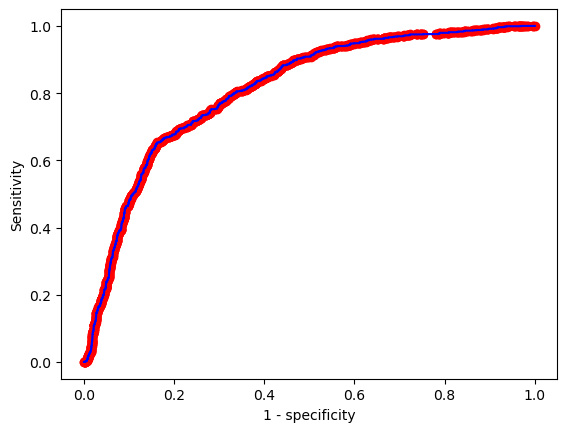

In [5]:

# Calculate the ROC curve and area under the curve
fpr, tpr, tres = roc_curve(y_test,y_pred_proba[:,1])
plt.scatter(fpr,tpr,c = 'red')
plt.plot(fpr,tpr,c='blue')
plt.xlabel("1 - specificity")
plt.ylabel("Sensitivity")
plt.show()


In [6]:
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import StratifiedKFold

# Calculate the area under the curve
print('Area under the curve: ',roc_auc_score(y_test,y_pred_proba[:,1]))

# Calculate the log loss
print('Log Loss Value',log_loss(y_test, y_pred_proba[:,1]))

# Perform cross-validation for the model
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

# Calculate the mean of the cross-validation scores
results = cross_val_score(lr,x,y,cv=kfold,scoring='roc_auc')
print('roc_auc',results.mean())

results = cross_val_score(lr,x,y,cv=kfold,scoring='neg_log_loss')
print('neg_log_loss',results.mean())


Area under the curve:  0.8101364665865365
Log Loss Value 0.4365044583525346
roc_auc 0.8153422808018324
neg_log_loss -0.4314834142708463


# ConfusionMatrix

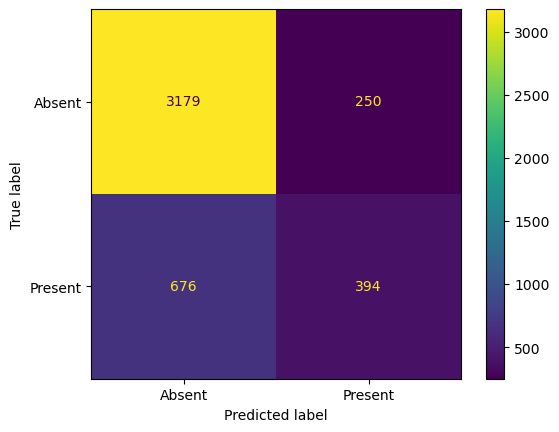

In [7]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Absent','Present'])
disp.plot()
plt.show()



# Grid Search CV

In [8]:
# Perform grid search for hyperparameter tuning

params= {'penalty':['l2',None],
        'solver':['lbfgs','newton-cg','newton-cholesky','sag']}

lr= LogisticRegression()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(lr,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)

print(gcv.best_params_)
print(gcv.best_score_)


{'penalty': 'l2', 'solver': 'newton-cholesky'}
-0.429848588576491
